# Problem Statement

## Create a model for predicting Breast Cancer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

In [2]:
#For Deployment
import pickle

In [2]:
df = pd.read_csv('wdbc.csv')

In [3]:
df.head(8)

,id,diagnosis,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8510426,B,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
5,857155,B,0,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,...,13.760,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301
6,857156,B,0,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
7,857343,B,0,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,...,12.980,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563


In [4]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   diagnosis_numeric        569 non-null    int64  
 3   radius                   569 non-null    float64
 4   texture                  569 non-null    float64
 5   perimeter                569 non-null    float64
 6   area                     569 non-null    float64
 7   smoothness               569 non-null    float64
 8   compactness              569 non-null    float64
 9   concavity                569 non-null    float64
 10  concave_points           569 non-null    float64
 11  symmetry                 569 non-null    float64
 12  fractal_dimension        569 non-null    float64
 13  radius_se                569 non-null    float64
 14  texture_se               5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis_numeric,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


## Feature Engineering

### Checking for null values

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
diagnosis_numeric          0
radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave_points             0
symmetry                   0
fractal_dimension          0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worse               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### No null values to handle

### Checking whether the target class is balanced or not

In [9]:
df["diagnosis_numeric"].value_counts()

0    357
1    212
Name: diagnosis_numeric, dtype: int64

[Text(0, 0, 'Benign'), Text(0, 0, 'Malignant')]

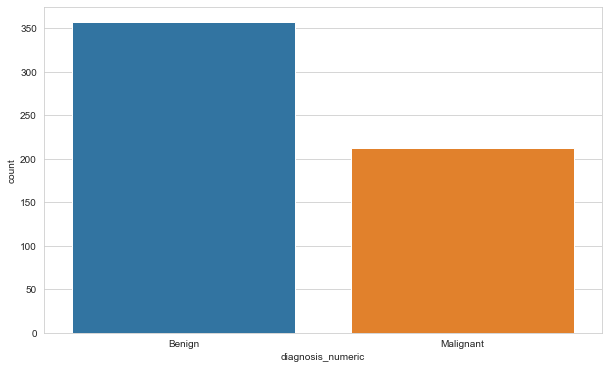

In [10]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="diagnosis_numeric",data=df)
plot.set_xticklabels(["Benign","Malignant"])

### Feature Selection

In [11]:
cols=df.columns
columns = [c for c in cols if c not in ["diagnosis","diagnosis_numeric","id"]]
X=df[columns]
y=df["diagnosis_numeric"]

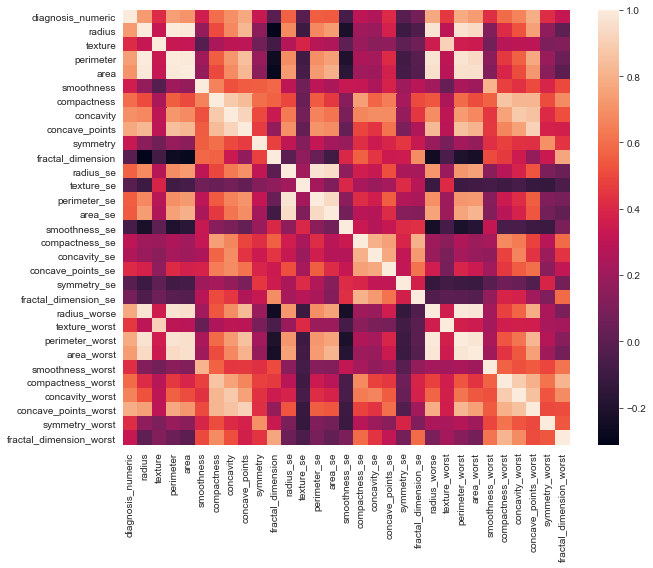

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop("id",axis=1).corr())

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [14]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.07235833 0.01856875 0.05035088 0.05995879 0.01146978 0.02696377
 0.0429133  0.07060195 0.00867518 0.00725323 0.01776663 0.00548353
 0.02221423 0.02593874 0.00600983 0.00607286 0.01168685 0.01587457
 0.00544967 0.00791237 0.07389984 0.02593689 0.09919341 0.08521582
 0.0196077  0.02188014 0.05179517 0.09857629 0.01626666 0.01410484]


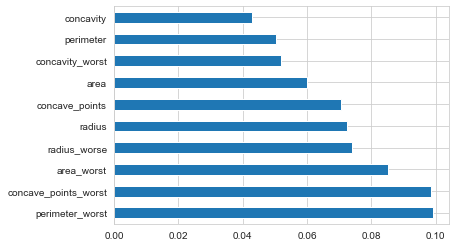

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [25]:
df.columns

Index(['id', 'diagnosis', 'diagnosis_numeric', 'radius', 'texture',
       'perimeter', 'area', 'smoothness', 'compactness', 'concavity',
       'concave_points', 'symmetry', 'fractal_dimension', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worse', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Used the greedy approach as well as the above technique to get the best features

In [45]:
x=df[["area","radius","concavity","perimeter_worst","perimeter","radius_worse","concave_points_worst"]]

In [46]:
y=df["diagnosis_numeric"]

## Model Creation

### Logisitic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101,test_size=0.6)

In [48]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948353 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.946838 (0.039063) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.945389 (0.039481) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.948353 (0.038446) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.943939 (0.042889) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.945389 (0.044009) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.943939 (0.047091) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.927931 (0.047698) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.935112 (0.049568) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.930764 (0.048113) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.923518 (0.045587) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.926416 (0.044822) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.923452 (0.050889) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.917523 (0.051213) wit

In [55]:
logisticRegr = LogisticRegression(C=100,penalty="l2",solver='liblinear')

In [56]:
model=logisticRegr.fit(x_train, y_train)

In [57]:
predictions = model.predict(x_test)

In [37]:
cm=confusion_matrix(y_test, predictions)
print(cm)

[[217  10]
 [  4 111]]


In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       227
           1       0.92      0.97      0.94       115

    accuracy                           0.96       342
   macro avg       0.95      0.96      0.95       342
weighted avg       0.96      0.96      0.96       342



In [39]:
model

LogisticRegression(C=100, solver='liblinear')

In [41]:
x_test.shape

(342, 7)

In [56]:
x_test.iloc[330:342]

,area,radius,concavity,perimeter_worst,perimeter,radius_worse,concave_points_worst
369,1123.0,19.170,0.206500,151.70,132.40,20.960,0.17670
537,599.5,13.980,0.112600,113.90,91.12,17.040,0.18270
311,819.8,16.300,0.055260,109.80,104.70,17.320,0.13570
534,685.0,14.900,0.273300,125.40,102.10,16.350,0.24750
85,302.4,9.904,0.130700,73.07,64.60,11.260,0.09910
381,1094.0,18.610,0.149000,139.90,122.10,21.310,0.14900
159,246.3,9.000,0.003681,60.90,56.36,9.699,0.01389
177,514.0,12.980,0.071070,99.21,84.52,14.420,0.09858
108,641.2,14.340,0.057240,110.40,92.51,16.770,0.10870
242,380.3,11.160,0.008955,79.26,70.95,12.360,0.04306


In [53]:
y_test.iloc[330:342]

369    1
537    1
311    0
534    1
85     0
381    1
159    0
177    0
108    0
242    0
172    0
115    0
Name: diagnosis_numeric, dtype: int64

In [54]:
new_data=x_test.iloc[330:342]

In [55]:
model.predict(new_data)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
#Use this model for further prediction on new data

In [40]:
# Saving model to disk
pickle.dump(model, open('breastCancer.pkl','wb'))